# ALI Youlyouz

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
%matplotlib inline

In [7]:
df=pd.read_csv("advertising.csv")

In [8]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


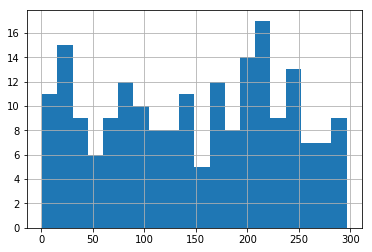

In [10]:
df['TV'].hist(bins=20)

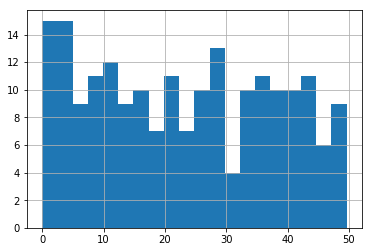

In [11]:
df['Radio'].hist(bins=20)

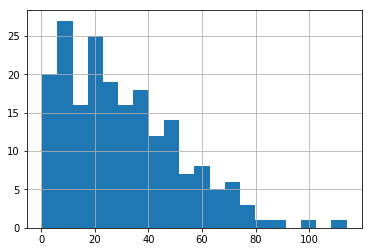

In [12]:
df['Newspaper'].hist(bins=20)

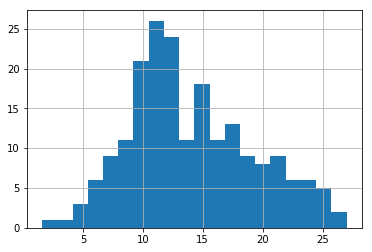

In [13]:
df['Sales'].hist(bins=20)

In [14]:
df.Sales.isnull().value_counts()

False    200
Name: Sales, dtype: int64

In [15]:
df.Radio.isnull().value_counts()

False    200
Name: Radio, dtype: int64

In [16]:
df.TV.isnull().value_counts()

False    200
Name: TV, dtype: int64

In [17]:
df.Newspaper.isnull().value_counts()

False    200
Name: Newspaper, dtype: int64

à partir des histogrammes, on peut dire qu'il n y'a pas de valeurs aberrantes

In [18]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


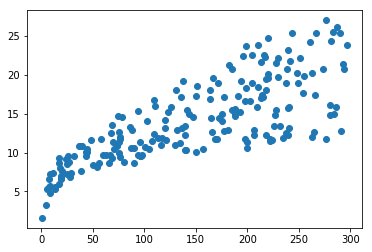

In [19]:
plt.scatter(df['TV'],df['Sales'])

........

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [21]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='Sales ~ Radio ', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 23 Oct 2018   Prob (F-statistic):           4.35e-19
Time:                        08:51:59   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
lm1.rsquared

0.33203245544529525

In [23]:
lm1.params

Intercept    9.311638
Radio        0.202496
dtype: float64

In [24]:
lm1.pvalues

Intercept    3.561071e-39
Radio        4.354966e-19
dtype: float64

In [25]:
MSE=1-lm1.rsquared
MSE

0.6679675445547048

In [26]:
lm2 = smf.ols(formula='Sales ~ TV ', data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 23 Oct 2018   Prob (F-statistic):           1.47e-42
Time:                        08:52:04   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
lm2.rsquared

0.611875050850071

In [28]:
lm2.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [29]:
lm2.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [30]:
MSE=1-lm2.rsquared
MSE

0.388124949149929

on explique le fait que TV est plus corrélée avec Sales que RAdio est corrélée avec Sales par le fait que les valeurs prises par TV ont un plus ordre de grndeur que celles prises par la variable Radio.

Pour refléter l'importance de chaque variable par rapport aux autres, il faut normaliser toutes les variables exogénes.

l'intercept correspond au nombre de ventes sales si le budget TV est nul.

Si le budget TV est nul, il y'aurait comme même la vente d'entre 6.13 à 7.93 unités de Sales avec une chance de 95%.

In [26]:
lm3 = smf.ols(formula='Sales ~ TV+Radio+Newspaper ', data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           1.58e-96
Time:                        14:39:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d'aorès la summary on voit que la variable Radio est plus importante que TV, qui à son tour paraît plus importante que Newspapers.

Si on augmente les sommes allouées à TV de 50, alors les ventes sales augmentront de 2,29.

On put expliquer le fait que le coefficient pour Newspaper est presque nul, légérement négatif, dans le modèle complet tandis qu'il est positif lorsque pris en compte individuellement par l'effet de multicolinéarité.

lm4 = smf.ols(formula='Sales ~ TV+Radio', data=df).fit()
lm4.summary()

 enlever la variable Newspaper n'améliore pas le modèle au niveau R^2, R^2_adj et de MSE

In [32]:
lm5=smf.ols(formula='Sales ~TV * Radio', data=df).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          6.68e-146
Time:                        15:36:52   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""